# Explore Dataset

In [1]:
import pandas as pd

path = "/kaggle/input/drug-classification/drug200.csv"
df = pd.read_csv(path)

In [2]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.shape

(200, 6)

# Data Preprocessing

In [4]:
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [5]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [6]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(list(numerical_cols))

categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(list(categorical_cols))

Numerical Columns:
['Age', 'Na_to_K']

Categorical Columns:
['Sex', 'BP', 'Cholesterol', 'Drug']


In [7]:
print("Unique values in categorical columns:")

for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"\n{col}: {len(unique_values)} unique values")
    print(unique_values)

Unique values in categorical columns:

Sex: 2 unique values
['F' 'M']

BP: 3 unique values
['HIGH' 'LOW' 'NORMAL']

Cholesterol: 2 unique values
['HIGH' 'NORMAL']

Drug: 5 unique values
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


# Label Encoding 

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


# Create the Unsupervised Dataset

In [9]:
X = df.drop('Drug', axis=1)
y = df['Drug']

print("X shape:", X.shape)

X shape: (200, 5)


# Elbow Method to Find Optimal K

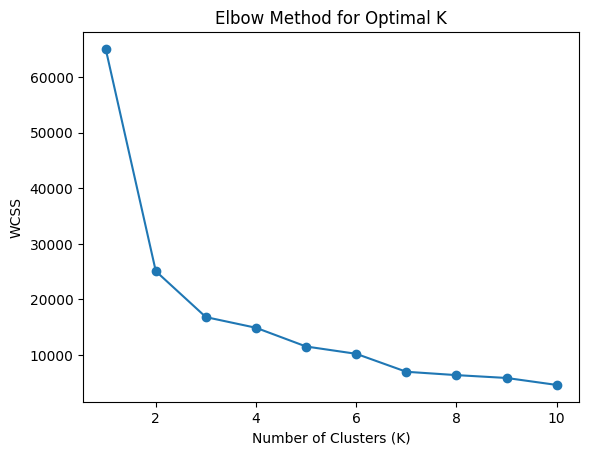

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

# K-Means Clustering 

In [11]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

X['Cluster'] = clusters

## 2D Plot

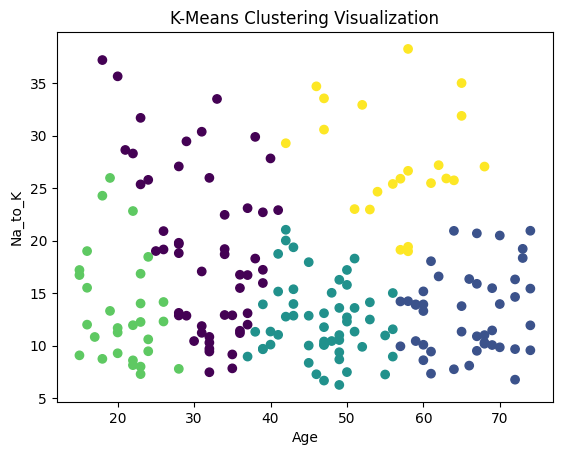

In [12]:
plt.figure()
plt.scatter(X['Age'], X['Na_to_K'], c=X['Cluster'])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.title("K-Means Clustering Visualization")
plt.show()

## tSNE Plot

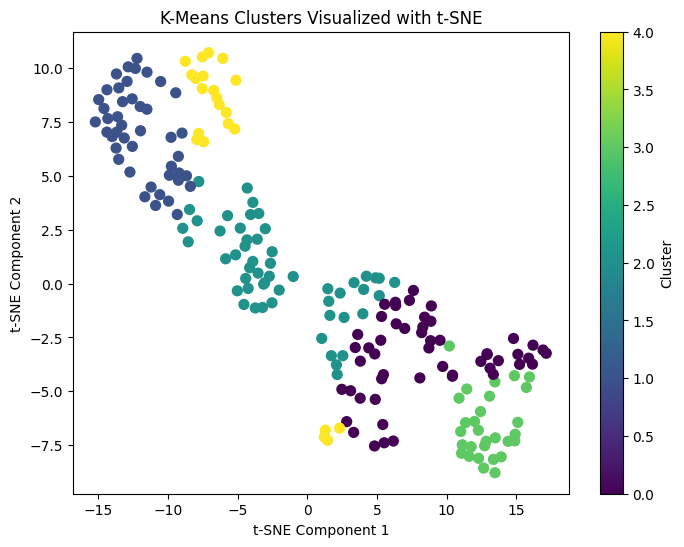

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.drop('Cluster', axis=1))  

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=X['Cluster'], cmap='viridis', s=50)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("K-Means Clusters Visualized with t-SNE")
plt.colorbar(label='Cluster')
plt.show()

# Comparison with Real Label

In [14]:
comparison_table = pd.DataFrame({
    'Drug Count': df['Drug'].value_counts(),
    'Cluster Count': X['Cluster'].value_counts()
})

comparison_table = comparison_table.fillna(0).astype(int)
comparison_table

,Drug Count,Cluster Count
0,91,52
1,23,44
2,16,53
3,16,29
4,54,22
